In [4]:
from osgeo import gdal
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

#### Loading the SRTM raster data by lat lon using elevation package
Source: https://pypi.org/project/elevation/

In [5]:
# !pip install elevation

In [ ]:
import elevation
!eio selfcheck

In [6]:
# specify the bounding box for the target area
wa_bounds = (-124.733174, 45.543541, -116.915989, 49.002494)

In [10]:
# set some variables for the SRTM dataset
cache_dir='data/srtm_elevation'
product='SRTM3'
output='wa_%s_full.tif' % product;

In [11]:
# load in the data
elevation.seed(bounds=wa_bounds, cache_dir=cache_dir, product=product, max_download_tiles=999)

'.data/srtm_elevation/SRTM3'

In [ ]:
# ! mv data/srtm_elevation /home/jovyan/data/

In [14]:
# build a vrt file for faster loading
!gdalbuildvrt /home/jovyan/data/srtm_elevation/SRTM3/cache/srtm.vrt /home/jovyan/data/srtm_elevation/SRTM3/cache/*.tif


0...10...20...30...40...50...60...70...80...90...100 - done.


In [22]:
! gdalinfo /home/jovyan/data/srtm_elevation/SRTM3/cache/srtm.vrt

Driver: VRT/Virtual Raster
Files: /home/jovyan/data/srtm_elevation/SRTM3/cache/srtm.vrt
       /home/jovyan/data/srtm_elevation/SRTM3/cache/srtm_12_03.tif
       /home/jovyan/data/srtm_elevation/SRTM3/cache/srtm_13_03.tif
Size is 12001, 6001
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-125.000416061317082,50.000417005657994)
Pixel Size = (0.000833333333333,-0.000833333333333)
Corner Coordinates:
Upper Left  (-125.0004161,  50.0004170) (125d 0' 1.50"W, 50d 0' 1.50"N)
Lower Left  (-125.0004161,  44.9995837) (125d 0' 1.50"W, 44d59'58.50"N)
Upper Right (-114.9995827,  50.0004170) (114d59'58.50"W, 50d 0' 1.50"N)
Lower Right (-114.9995827,  44.9995837) (114d59'58.50"W, 44d59'58.50"N)
Center      (-119.9999994,  47.5000003) (120d 0' 0.00"W, 47d30' 0.0

In [25]:
# %%bash
# source /home/jovyan/.bash_profile  

# dem_geoid --reverse-adjustment /home/jovyan/data/srtm_elevation/SRTM3/cache/srtm.vrt

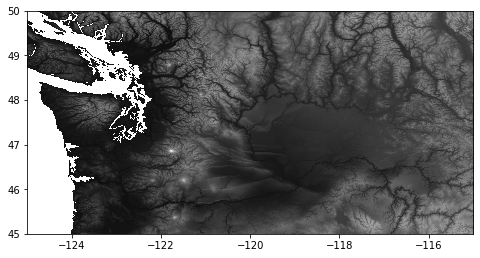

In [15]:
# open using rasterio and plot
srtm_vrt = rasterio.open('./data/srtm_elevation/SRTM3/cache/srtm.vrt')
f,ax = plt.subplots(figsize=(8,10))
show(srtm_vrt, ax=ax,cmap='gray')

In [16]:
# subset to target area
ds = gdal.Open('./data/srtm_elevation/SRTM3/cache/srtm.vrt')
ds = gdal.Translate('./data/srtm_elevation/SRTM3/cache/srtm_wa_subset.vrt', ds, projWin = [-121.855968, 48.774327, -121.796142, 48.712009])
ds = None

In [17]:
! ls ~/data/srtm_elevation/SRTM3/cache/

srtm_12_03.tif	     srtm_13_03.tif	  srtm.vrt
srtm_12_03.tif.lock  srtm_13_03.tif.lock  srtm_wa_subset.vrt


In [19]:
!pwd

/home/jovyan/topohack/friedrich


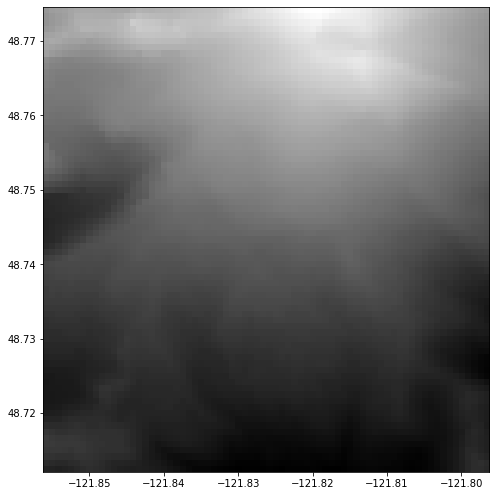

In [20]:
# plot target area
srtm_wa_subset_vrt = rasterio.open('/home/jovyan/data/srtm_elevation/SRTM3/cache/srtm_wa_subset.vrt')
f,ax = plt.subplots(figsize=(8,10))
show(srtm_wa_subset_vrt, ax=ax,cmap='gray')